In [35]:
#IMPORTING ALL THE LIBRARIES REQUIERED FOR THE PROJECT

from sklearn.svm import SVC                                        #for svm model
from sklearn.feature_extraction.text import CountVectorizer        #for removing stop words from reviews
from sklearn.pipeline import make_pipeline                         #for making pipline
from sklearn.naive_bayes import MultinomialNB                      #for naive bayes model
from sklearn.metrics import accuracy_score                         #for measuring the accuracy of the models
from sklearn.model_selection import train_test_split               #to divide the given dataset into training and testing datasets
import pandas as pd                                                #to create and analyise the given data
import matplotlib.pyplot as plt                                    #to plot the dataset
import joblib                                                      #to create a file for model to be used for predictions

In [54]:
#to create data frame from given tsv file
df=pd.read_table("/content/Restaurant_Reviews.tsv")                
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [38]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [39]:
df["Liked"].value_counts()

1    500
0    500
Name: Liked, dtype: int64

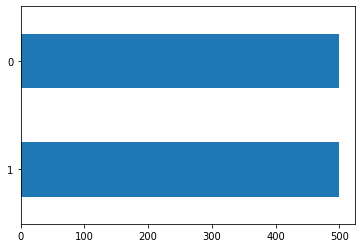

In [40]:
df["Liked"].value_counts().plot(kind = 'barh')

In [41]:
#dividing dataframe into input and output
x=df["Review"].values
y=df["Liked"].values

In [42]:
#distributing data into training and testing datasets
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=99073)

In [43]:
#using CountVectorizer to remove stop words 
vect=CountVectorizer(stop_words="english")   
x_train_vect=vect.fit_transform(x_train)     #fitting training inputs
x_test_vect=vect.transform(x_test)           #transforming testing inputs

In [44]:
#making different models
model1=SVC()
model2=make_pipeline(CountVectorizer(),SVC())
model3=MultinomialNB()
model4=make_pipeline(CountVectorizer(),MultinomialNB())

In [45]:
#fitting training data into models
model1.fit(x_train_vect,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train_vect,y_train)
model4.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [46]:
#predicting the outputs of the testing data
y_pred1=model1.predict(x_test_vect)
y_pred2=model2.predict(x_test)
y_pred3=model3.predict(x_test_vect)
y_pred4=model4.predict(x_test)

In [47]:
#printing the accuracy scores of all models
print(accuracy_score(y_pred1,y_test),accuracy_score(y_pred2,y_test),accuracy_score(y_pred3,y_test),accuracy_score(y_pred4,y_test))

0.8 0.808 0.812 0.904


In [48]:
#to create a file for model to be used for predictions
joblib.dump(model4,"Restaurant_Review")

['Restaurant_Review']

Using joblib to predict an already trained model

In [49]:
import joblib
review_model=joblib.load("Restaurant_Review")                   #loading the model

In [50]:
output_list=["Negative","Positive"]
model_prediction=review_model.predict(["Great food,loved the interior"])    #loaded model predicting the output of the given review
output_list[int(model_prediction)]                                          #converting the 0 or 1 to negetive or positive 

'Positive'

In [51]:
!pip install streamlit --quiet                       #installing streamlit

In [52]:
#creating a streamlit web application using the joblib loaded predicting model
%%writefile app.py 
import streamlit as st 
import joblib

# Add a title to the webapp
st.title("Restaurant_Review")

# Import the model 
model = joblib.load("Restaurant_Review")

#input bar creation 
review= st.text_input("Input the Review here:")

#Predict the output 
y_pred = model.predict([review])

# print the predicted output 
output = ["Negative","Positive"]
st.title(output[int(y_pred)]) 

Overwriting app.py


In [53]:
!streamlit run app.py & npx localtunnel --port 8501  

2022-07-11 19:18:59.596 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.66.168.123:8501

npx: installed 22 in 3.24s
your url is: https://flat-hornets-create-34-66-168-123.loca.lt
  Stopping...
^C


# SENTIMENT ANAYLISIS

Sentiment analysis is the use of natural language processing (NLP), text analysis, and other techniques to analyse, mine, or examine data. Sentiment analysis is used to determine if the information or data obtained is favourable, negative, or neutral. It is the process of identifying the emotional tone of a series of words, which is used to get an understanding of the attitudes, ideas, and feelings expressed in a text.



# TWITTER ANALYSIS

Twitter sentiment analysis is the sentiment analysis of data obtained on Twitter. Because so many individuals use Twitter, the data is diverse and can be utilised for a variety of purposes, such as gathering industry statistics, keeping track of political opinions, or collecting public reactions to major events.Usually, this is done via Twitter's API, Tweety.